In [1]:
import pandas as pd
import numpy as np
#make a dataframe
df = pd.read_csv("cancer.csv")

df.shape
#get the column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

/Users/mertinandogan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

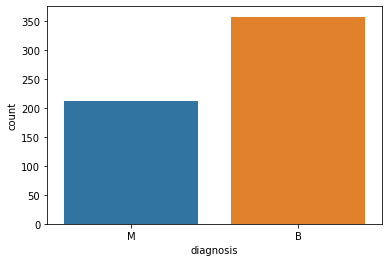

In [2]:
import seaborn as sns
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed: 32 column
df = df.dropna(axis=1)
#Get a count of the number of 'M' & 'B' cells
df['diagnosis'].value_counts()
#Visualize this count 
sns.countplot(df['diagnosis'],label="Count")

Text(0.5, 1.0, 'Graph of texture mean vs diagnosis of tumor')

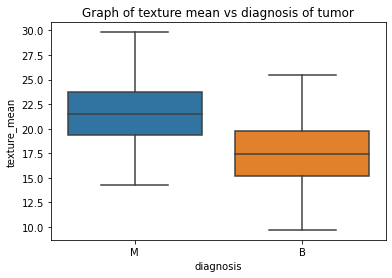

In [3]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x="diagnosis", y="texture_mean", data=df, showfliers=False)
plot.set_title("Graph of texture mean vs diagnosis of tumor")

In [4]:
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features 
list = ["id","diagnosis"]
# X includes our features
X = df.drop(list,axis = 1)


<AxesSubplot:>

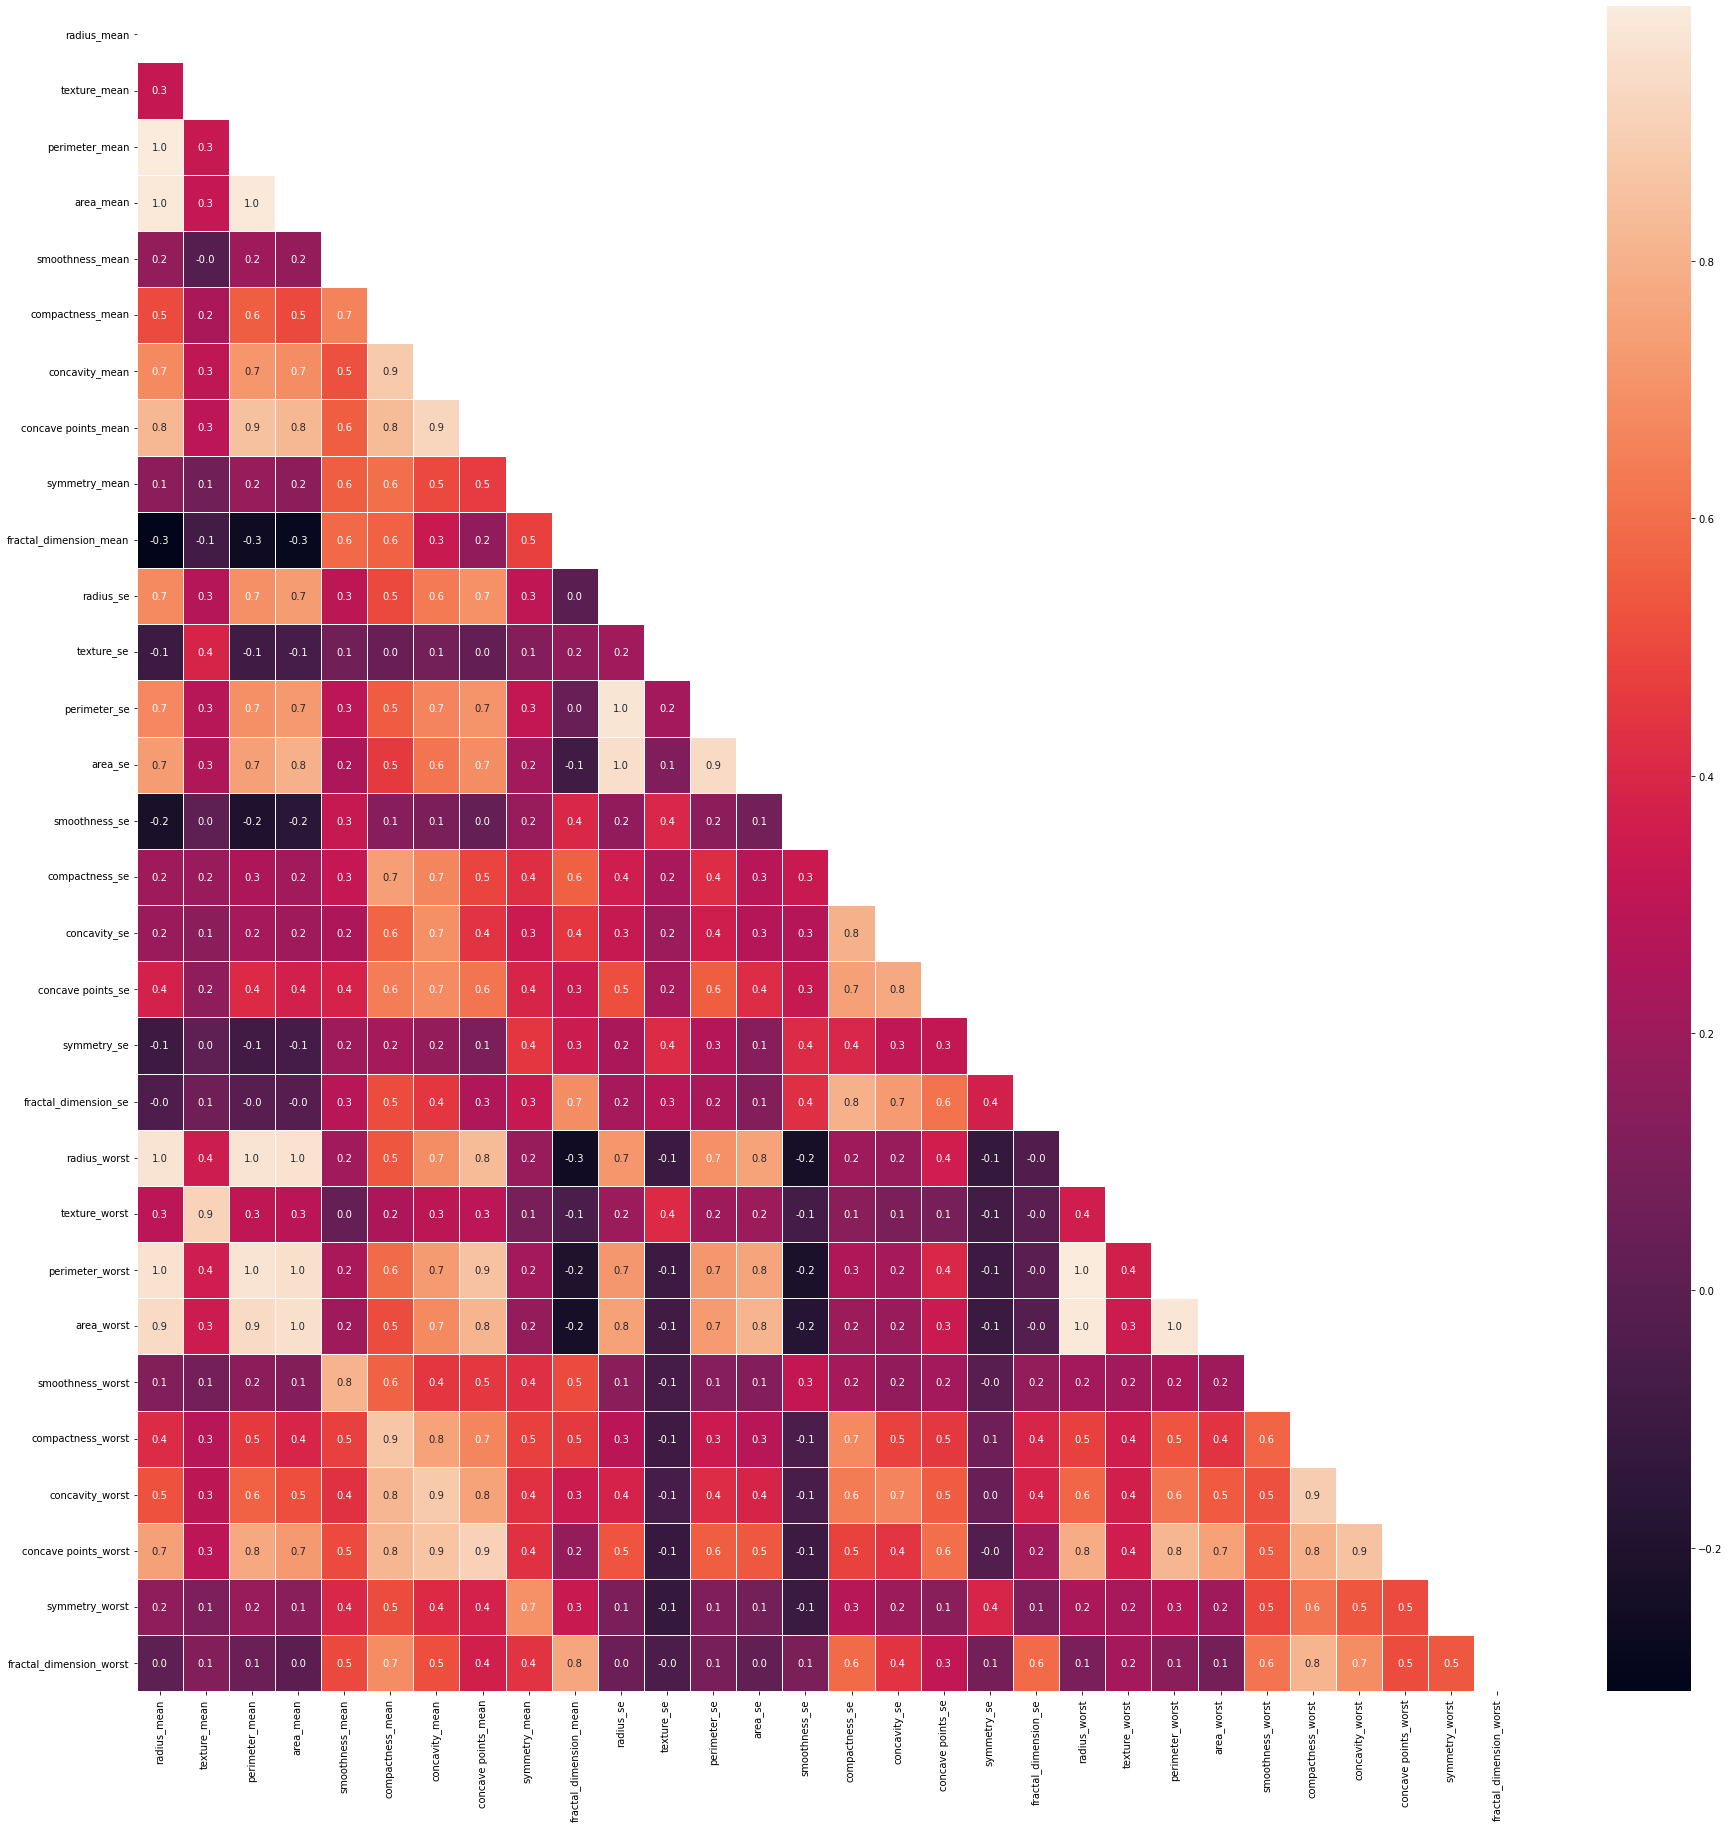

In [5]:
import matplotlib.pyplot as plt
#correlation map
f,ax = plt.subplots(figsize=(31, 31))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= ".1f",ax=ax, mask=matrix)

In [6]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X = X.drop(X[to_drop], axis=1)
print(len(X.columns))

23


/var/folders/4d/6_jh41_d3hbbyy2p5ff1x5_c0000gn/T/ipykernel_7782/3815253047.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [7]:
#Encoding categorical data values M-1 B-0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
print(labelencoder_y.fit_transform(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 17)

In [9]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Define a function which trains models
def models(X_train,y_train):
    
  #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
  #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, svc_rbf, tree, forest
#get the training results
model = models(X_train,y_train)


[0]Logistic Regression Training Accuracy: 0.9868131868131869
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9846153846153847
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9868131868131869
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 1.0


In [11]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 
 cm = confusion_matrix(y_test, model[i].predict(X_test))
 
 TN = cm[0][0]
 TP = cm[1][1]
 FN = cm[1][0]
 FP = cm[0][1]
 
 print(cm)
 print("Model[{}] Testing Accuracy = “{}”".format(i, (TP + TN) / (TP + TN + FN + FP)))
 print()# Print a new line


[[71  1]
 [ 3 39]]
Model[0] Testing Accuracy = “0.9649122807017544”

[[72  0]
 [ 4 38]]
Model[1] Testing Accuracy = “0.9649122807017544”

[[72  0]
 [ 3 39]]
Model[2] Testing Accuracy = “0.9736842105263158”

[[67  5]
 [ 2 40]]
Model[3] Testing Accuracy = “0.9385964912280702”

[[71  1]
 [ 4 38]]
Model[4] Testing Accuracy = “0.956140350877193”



In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
 print("Model ",i)
 #Check precision, recall, f1-score
 print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
 print(accuracy_score(y_test, model[i].predict(X_test)))
 print()#Print a new line


Model  0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model  1
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Model  2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighte

In [13]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from catboost import CatBoostClassifier
cat_features_index = np.where(X.dtypes != float)[0]
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42)
model = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=42)
model.fit(X_train, y_train, cat_features=cat_features_index, eval_set=(X_test, y_test))

Learning rate set to 0.026088
0:	learn: 0.9560440	test: 0.9210526	best: 0.9210526 (0)	total: 63.6ms	remaining: 1m 3s
1:	learn: 0.9538462	test: 0.9122807	best: 0.9210526 (0)	total: 65.1ms	remaining: 32.5s
2:	learn: 0.9692308	test: 0.9122807	best: 0.9210526 (0)	total: 66.6ms	remaining: 22.1s
3:	learn: 0.9626374	test: 0.9298246	best: 0.9298246 (3)	total: 67.8ms	remaining: 16.9s
4:	learn: 0.9692308	test: 0.9298246	best: 0.9298246 (3)	total: 69.1ms	remaining: 13.8s
5:	learn: 0.9714286	test: 0.9385965	best: 0.9385965 (5)	total: 70.4ms	remaining: 11.7s
6:	learn: 0.9670330	test: 0.9385965	best: 0.9385965 (5)	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9648352	test: 0.9385965	best: 0.9385965 (5)	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9670330	test: 0.9385965	best: 0.9385965 (5)	total: 74.1ms	remaining: 8.16s
9:	learn: 0.9670330	test: 0.9385965	best: 0.9385965 (5)	total: 75.4ms	remaining: 7.46s
10:	learn: 0.9670330	test: 0.9385965	best: 0.9385965 (5)	total: 76.6ms	remaining: 6.89s
11:	learn: 0

215:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 384ms	remaining: 1.39s
216:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 385ms	remaining: 1.39s
217:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 387ms	remaining: 1.39s
218:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 388ms	remaining: 1.38s
219:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 390ms	remaining: 1.38s
220:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 391ms	remaining: 1.38s
221:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 392ms	remaining: 1.38s
222:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 394ms	remaining: 1.37s
223:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 395ms	remaining: 1.37s
224:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 397ms	remaining: 1.36s
225:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 398ms	remaining: 1.36s
226:	learn: 1.0000000

346:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 578ms	remaining: 1.09s
347:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 580ms	remaining: 1.09s
348:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 582ms	remaining: 1.08s
349:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 583ms	remaining: 1.08s
350:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 584ms	remaining: 1.08s
351:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 586ms	remaining: 1.08s
352:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 587ms	remaining: 1.08s
353:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 589ms	remaining: 1.07s
354:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 590ms	remaining: 1.07s
355:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 591ms	remaining: 1.07s
356:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 593ms	remaining: 1.07s
357:	learn: 1.0000000

474:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 771ms	remaining: 852ms
475:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 773ms	remaining: 851ms
476:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 774ms	remaining: 849ms
477:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 775ms	remaining: 847ms
478:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 777ms	remaining: 845ms
479:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 778ms	remaining: 843ms
480:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 780ms	remaining: 841ms
481:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 781ms	remaining: 839ms
482:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 783ms	remaining: 838ms
483:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 784ms	remaining: 836ms
484:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 786ms	remaining: 834ms
485:	learn: 1.0000000

604:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 964ms	remaining: 630ms
605:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 966ms	remaining: 628ms
606:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 967ms	remaining: 626ms
607:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 969ms	remaining: 625ms
608:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 970ms	remaining: 623ms
609:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 972ms	remaining: 621ms
610:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 973ms	remaining: 619ms
611:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 975ms	remaining: 618ms
612:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 976ms	remaining: 616ms
613:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 978ms	remaining: 615ms
614:	learn: 1.0000000	test: 0.9385965	best: 0.9649123 (13)	total: 979ms	remaining: 613ms
615:	learn: 1.0000000

715:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.15s	remaining: 458ms
716:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 456ms
717:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 455ms
718:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 453ms
719:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 451ms
720:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 450ms
721:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 448ms
722:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.16s	remaining: 446ms
723:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.17s	remaining: 445ms
724:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.17s	remaining: 443ms
725:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.17s	remaining: 441ms
726:	learn: 1.0000000

842:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.34s	remaining: 251ms
843:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 249ms
844:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 248ms
845:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 246ms
846:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 244ms
847:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 243ms
848:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.35s	remaining: 241ms
849:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.36s	remaining: 239ms
850:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.36s	remaining: 238ms
851:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.36s	remaining: 236ms
852:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.36s	remaining: 234ms
853:	learn: 1.0000000

973:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.54s	remaining: 41.1ms
974:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.54s	remaining: 39.6ms
975:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.54s	remaining: 38ms
976:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.54s	remaining: 36.4ms
977:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 34.8ms
978:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 33.2ms
979:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 31.6ms
980:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 30.1ms
981:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 28.5ms
982:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.55s	remaining: 26.9ms
983:	learn: 1.0000000	test: 0.9473684	best: 0.9649123 (13)	total: 1.56s	remaining: 25.3ms
984:	learn: 

In [15]:
from catboost import cv
from sklearn.metrics import accuracy_score
print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test,model.predict(X_test))))

the test accuracy is :0.964912


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgm